# 3. 데이터전처리 및 시각화


## 3.1. 데이터 재구조화
- 현업에서는 분석가가 수집한 데이터가 원하는 형태로 수집되지 않아서 따로 변형 시켜야하는 경우가 빈번이 발생됩니다.
- 또한 각 그룹에 따른 통계량을 보고싶은 경우에도 코딩을 통한 데이터의 변형이 필요하게됩니다.
- 수집한 데이터를 데이터에 활용하기 위해서 원하는 형태로
변형해야 하는 일은 빈번히 발생하며,  
주로 사용되는 형태
변환은 long → wide, wide → long의 형태로 변형하는 경우가
많습니다.

In [1]:
# 데이터 읽기 (Sample2.csv)
import pandas as pd
sample2 = pd.read_csv('sample2.csv')
sample2.head()

,index,col,value
0,1,x1,50
1,2,x1,70
2,1,x2,60
3,2,x2,80
4,1,x3,70


In [2]:
# 데이터 재구조화(long -> wide) ver1 : 자체 함수 사용하기
sample_wide = sample2.pivot(index = 'index', columns = 'col', values='value')
sample_wide

col,x1,x2,x3
index,,,
1,50,60,70
2,70,80,80


In [3]:
# 데이터 재구조화(long->wide ver2) : pandas 함수 사용하기
sample_wide2 = pd.pivot_table(sample2, index = 'index', columns='col', values = 'value')
print(list(sample_wide2)) # 데이터프레임의 컬럼명
sample_wide2

['x1', 'x2', 'x3']


col,x1,x2,x3
index,,,
1,50.0,60.0,70.0
2,70.0,80.0,80.0


In [4]:
sample_wide2 = sample_wide2.reset_index()
print(list(sample_wide2))
sample_wide2

['index', 'x1', 'x2', 'x3']


col,index,x1,x2,x3
0,1,50.0,60.0,70.0
1,2,70.0,80.0,80.0


In [5]:
# ver1(내장함수), ver2(pandas 함수) 비교
# ver1 :
# 단순히 재배치하는 경우,
# index+columns 조합에 중복이 있으면 안됨
# 1:1 매칭만 될 때 사용 가능

# ver2 :
# 단순히 재배치만 하는 것이 아니라 집계가 가능함
# 원하는 값으로 집계할 수 있음 (aggfunc 옵션)
# NaN을 원하는 값을 지정할 수 있음 (fill_value 옵션)

# 예시 데이터
test_df = pd.DataFrame({
    '날짜': ['1월', '1월', '1월', '2월', '2월', '3월'],
    '과목': ['수학', '수학', '영어', '수학', '영어', '영어'],
    '점수': [80, 90, 85, 70, 100, 95]
})

# ver1: pivot → 중복 있으면 에러
#test_df.pivot(index='날짜', columns='과목', values='점수')

# ver2 : pivot_table → 중복 있어도 집계 (평균)
test_df.pivot_table(index='날짜', columns='과목', values='점수', aggfunc='mean')

# fill_value 사용
# test_df.pivot_table(index='날짜', columns='과목', values='점수', aggfunc='mean', fill_value=0)

과목,수학,영어
날짜,,
1월,85.0,85.0
2월,70.0,100.0
3월,NaN,95.0


In [6]:
# 데이터 재 구조화(wide -> long)
sample_long = pd.melt(sample_wide2, id_vars = 'index')
sample_long

,index,col,value
0,1,x1,50.0
1,2,x1,70.0
2,1,x2,60.0
3,2,x2,80.0
4,1,x3,70.0
5,2,x3,80.0


## 3.2. 데이터 결합 (Union)
- Union은 데이터 결합의 방법 중 하나로 2개 이상의 데이터를 가로 방향으로 기존 데이터 아래 결합시키는 방법을 의미함
- 기존 데이터 아래로 결합시키는 경우 동일한 컬럼을 기준으로 결합시킴


In [7]:
# 샘플 데이터 읽기
tb04 = pd.read_csv("tb_order_202104.csv")
tb05 = pd.read_csv("tb_order_202105.csv")

tb04.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


In [8]:
# 04월 데이터와 05월 데이터 형태
print(tb04.shape)
print(tb05.shape)

(233262, 10)
(241142, 10)


In [9]:
# Union 결합
tb_all = pd.concat([tb04, tb05])
print(tb_all.shape)
tb_all.head()

(474404, 10)


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


In [10]:
# 중복된 데이터가 있는 경우, 중복 제거가 가능 (원본데이터에 적용할 것인가 : inplace)
tb_all.drop_duplicates(inplace = True)

# index 초기화 하기 (drop : DataFrame내에서 index를 삭제 할 것인가, inplace : 원본데이터에 적용할 것인가)
tb_all.reset_index(drop = True, inplace = True)
tb_all.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


## 3.3. 데이터 결합 (Left Join)
- Left Join은 데이터 결합의 방법 중 하나로 왼쪽 데이터를 기준으로 오른쪽 데이터를 옆으로 결합시키는 방법을 의미함
- 왼쪽 데이터에 오른쪽 데이터를 결합시키는 경우 “key” 컬럼 이라고 불리우는 컬럼을 기준으로 결합시킴



In [11]:
# 샘플 데이터 읽기
m_store = pd.read_csv('m_store.csv')
m_store.head()

,store_id,store_name,area_cd
0,1,삼일대로점,SL
1,2,세종대로점,SL
2,3,무교로점,SL
3,4,덕수궁길점,SL
4,5,서소문로점,SL


In [12]:
# Left Join (on : key컬럼 지정, 컬럼명이 다를경우 left_on, right_on 사용)
order_df = pd.merge(tb_all, m_store, on = 'store_id', how = 'left')
order_df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ


## 3.4. 데이터 시각화
- 실습 데이터는 총 3개의 데이터를 활용합니다.
서울의 지역(시군구)이름 및 코드 정보와, 서울 일별 지역별 날씨 관련 정보 및 눈병 환자 수 데이터, 서울 지역별 년도별 인구수 데이터를 활용합니다.



In [13]:
# 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#한글 폰트 깨짐 방지
!apt-get -qq install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [14]:
# 데이터 읽기
sgg_cd = pd.read_csv("sigungu_code2.csv")
tot_df = pd.read_csv("tot_df_v03.csv")
sgg_cd.head()
#tot_df.head()

,SIGUNGU_CD,SIGUNGU_NM
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구


### 3.4.1. 범주형 데이터 시각화 (막대그래프, 그룹별 통계량)

In [15]:
# tot_df의 date에서 년/월/일 분류하기
tot_df['year']  = tot_df['date'].str[0:4]
tot_df['month'] = tot_df['date'].str[5:7]
tot_df['day']   = tot_df['date'].str[8:10]
tot_df.loc[:,['year', 'month', 'day']].head()

,year,month,day
0,2014,01,01
1,2014,01,01
2,2014,01,01
3,2014,01,01
4,2014,01,01


In [16]:
# 시군구 코드가 tot_df에서 잘못된 case가 있어서 수정을 위해 merge를 사용하여 결합 (ex: 종로구)
tot_df = pd.merge(tot_df, sgg_cd, left_on='sigungu', right_on='SIGUNGU_NM', how = 'left')
tot_df.loc[:, ['sigungu_cd', 'sigungu', 'SIGUNGU_CD', 'SIGUNGU_NM']].head()

,sigungu_cd,sigungu,SIGUNGU_CD,SIGUNGU_NM
0,11110,종로구,11010,종로구
1,11140,중구,11020,중구
2,11170,용산구,11030,용산구
3,11200,성동구,11040,성동구
4,11215,광진구,11050,광진구


In [17]:
# 년도별 / 월별 / 일별 데이터 눈병 환자 수 확인
year_eye  = tot_df.groupby(['year']).agg({'eye':'sum'})
month_eye = tot_df.groupby(['month']).agg({'eye':'sum'})
day_eye   = tot_df.groupby(['day']).agg({'eye':'sum'})

year_eye.reset_index(inplace=True)
month_eye.reset_index(inplace=True)
day_eye.reset_index(inplace=True)

#year_eye
#month_eye
#day_eye

In [18]:
# 막대그래프를 활용한 시각화
# 패키지
import matplotlib.pyplot as plt  # MATLAB 스타일의 그래프 인터페이스를 제공하여 간단하게 그래프를 그리게 해주는 도구
from matplotlib import gridspec  # subplot을 격자(grid) 형태로 더 세밀하게 나누고 배치할 수 있게 해주는 도구
import seaborn as sns
import os
plt.rc('font', family='NanumBarunGothic')

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, '년도별 총 눈병 환자 수')

Text(0.5, 0, '년도')

Text(0, 0.5, '총 눈병 환자 수')

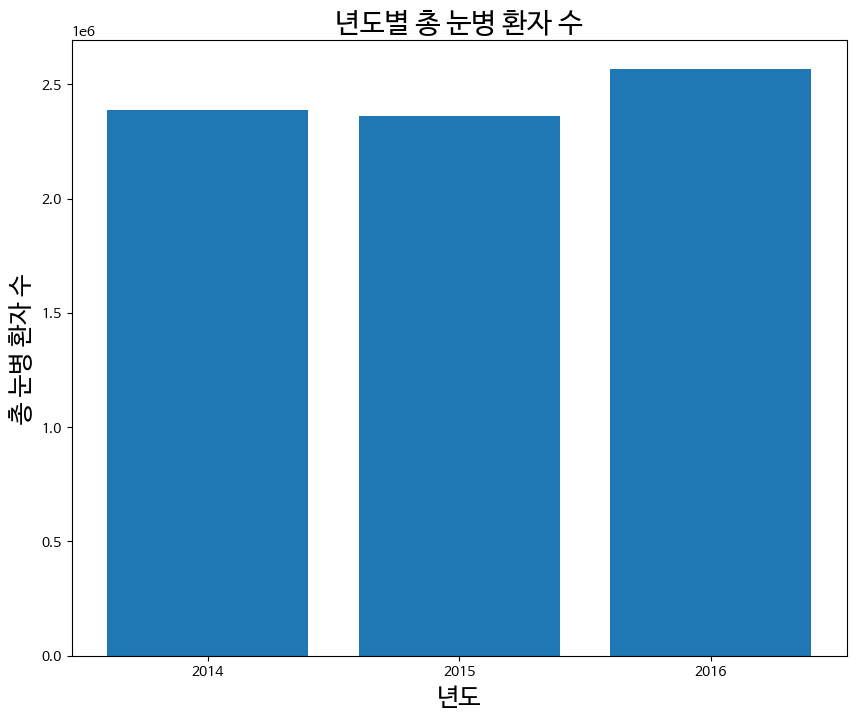

In [19]:
plt.figure(figsize=(10,8))

plt.bar(year_eye['year'], year_eye['eye'])
plt.title('년도별 총 눈병 환자 수', fontsize = 20)
plt.xlabel('년도', fontsize = 18)
plt.ylabel('총 눈병 환자 수', fontsize = 18)
#plt.xticks(fontsize = 15)
plt.show()

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, '월별 총 눈병 환자 수')

Text(0.5, 0, '월')

Text(0, 0.5, '총 눈별 환자 수')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

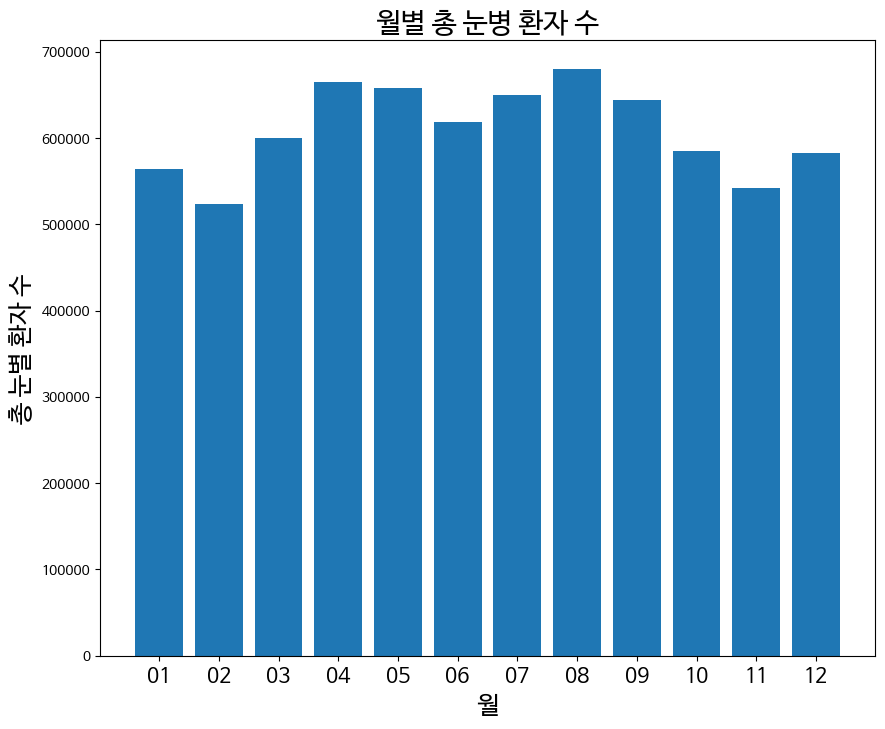

In [20]:
plt.figure(figsize=(10,8))

plt.bar(month_eye['month'], month_eye['eye'])
plt.title('월별 총 눈병 환자 수', fontsize = 20)
plt.xlabel('월', fontsize = 18)
plt.ylabel('총 눈별 환자 수', fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()

<Figure size 2000x800 with 0 Axes>

<BarContainer object of 31 artists>

Text(0.5, 1.0, '날짜별 총 눈병 환자 수')

Text(0.5, 0, '날짜')

Text(0, 0.5, '총 눈별 환자 수')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

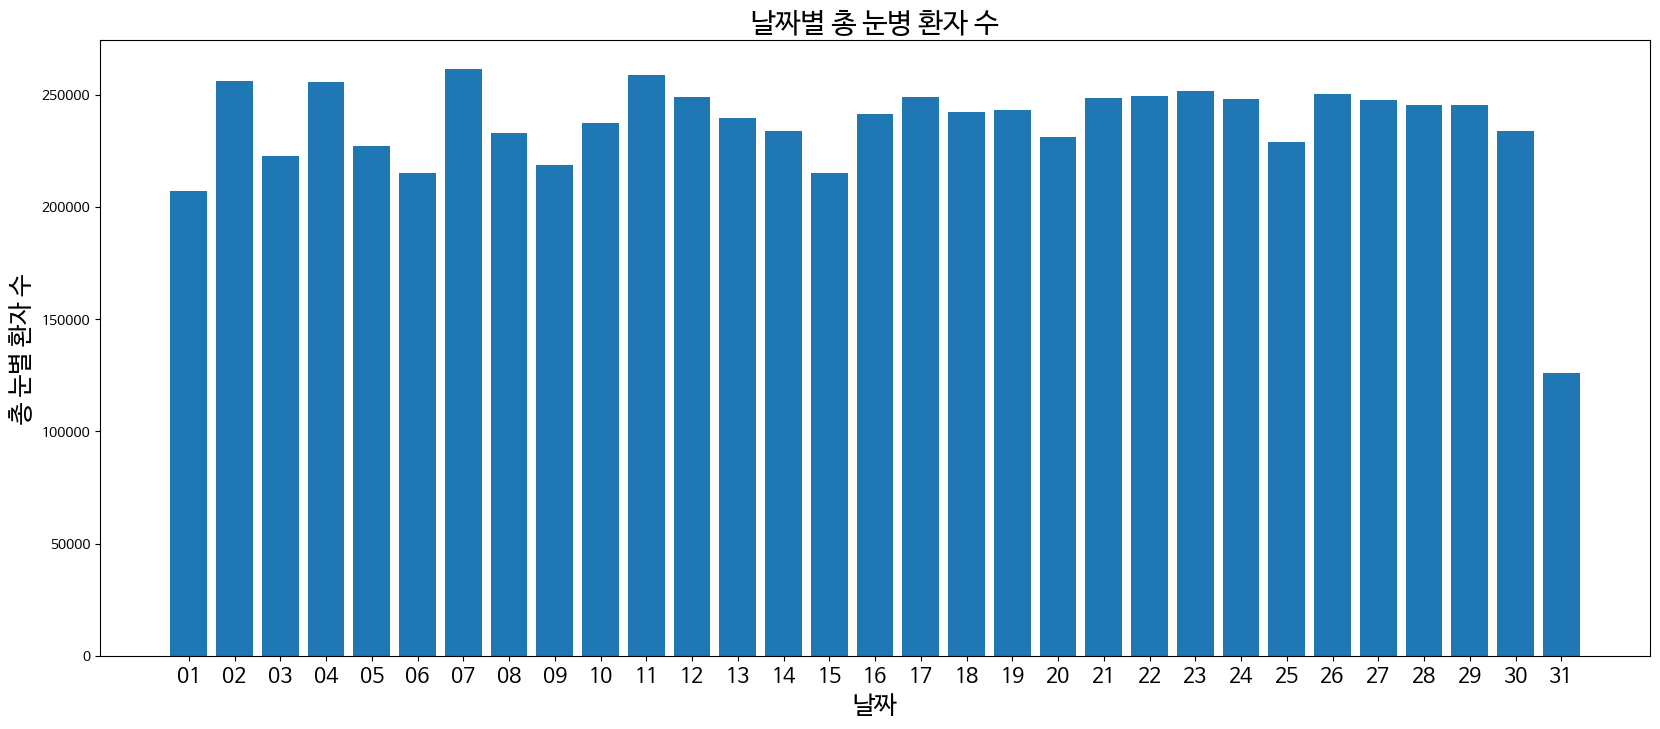

In [21]:
plt.figure(figsize=(20,8))

plt.bar(day_eye['day'], day_eye['eye'])
plt.title('날짜별 총 눈병 환자 수', fontsize = 20)
plt.xlabel('날짜', fontsize = 18)
plt.ylabel('총 눈별 환자 수', fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()

In [22]:
# 요일별로 확인하기
tot_df['date'] = pd.to_datetime(tot_df['date'])
tot_df['weekday'] = tot_df['date'].dt.day_name()
tot_df['weekday']

,weekday
0,Wednesday
1,Wednesday
2,Wednesday
3,Wednesday
4,Wednesday
...,...
27395,Saturday
27396,Saturday
27397,Saturday
27398,Saturday
